# Colorful Figures 

In [1]:
%matplotlib inline
from __future__  import division
from tempfile import NamedTemporaryFile
from StringIO import StringIO
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from fatiando.mesher import Tesseroid
from fatiando.constants import MEAN_EARTH_RADIUS
from fatiando.vis import myv, mpl
import fatiando

/Users/deng/anaconda/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")
/Users/deng/anaconda/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
print('Fatiando a Terra version: {}'.format(fatiando.__version__))

Fatiando a Terra version: 0.5


In [3]:
!tessgzzz --version

2017

In [4]:
mpl.rc('font', size=12, family='serif')

# Figure A

In [5]:
plt.rcParams['axes.labelsize'] = 9.0  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 9.0  # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 9.0  # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 9.0
plt.rcParams['font.family'] = 'sans'
# plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.usetex'] = True  # use latex for all text handling
plt.rcParams['text.color'] = '3a3a3a'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = '3a3a3a'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.major.size'] = 1
plt.rcParams['ytick.major.size'] = 1

In [6]:
shell = pd.read_csv('data/shell-per-height.csv', index_col=0)

In [7]:
def load_max_diff(fname):
    data = pd.read_csv(fname)
    return data.groupby(['size', 'ratio']).max()

In [8]:
pole = load_max_diff('data/difference-size-1-height-2000-pole.csv')
equator = load_max_diff('data/difference-size-1-height-2000-equator.csv')
goce = load_max_diff('data/difference-size-1-height-260000-pole.csv')
big = load_max_diff('data/difference-size-30-height-2000-pole.csv')

In [9]:
ratio = pole.index.levels[1] # Get the unique values of the distance-size ratio used

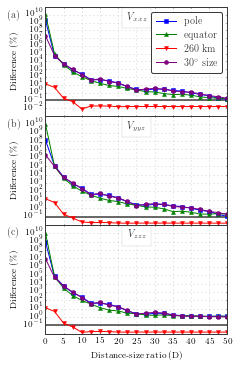

In [10]:
plotargs = dict(markeredgewidth=0.5)
styles = "-s -^ -v -o".split()
colors = [u'#0000FF', u'#008000', u'#FF0000', u'#800080']
fig, subplots = plt.subplots(3, 1, figsize=(3.2, 5), sharex='col')
axes = subplots.ravel()
fields = ['gxxz', 'gyyz', 'gzzz']
titles = [r'$V_{xxz}$', r'$V_{yyz}$', r'$V_{zzz}$']
subfigure = ['(a)', '(b)', '(c)']
for ax, f, title, sub in zip(axes, fields, titles, subfigure):
    ax.text(-0.21, 0.9, sub, fontsize=10, fontdict={'weight': 'bold'},#weight
            transform=ax.transAxes)
    ax.text(0.5, 0.9, title, fontsize=10, 
            horizontalalignment='center', verticalalignment='center',
            bbox={'facecolor': 'w', 
                  'edgecolor': '#9b9b9b',
                  'linewidth': 0.2, 'pad': 5.5}, 
            transform=ax.transAxes)
    shell_low = np.abs(shell[shell.height == 2000][f].values)
    shell_high = np.abs(shell[shell.height == 260000][f].values)
    ax.plot(ratio, 100*pole[f]/shell_low, styles[0], label='pole', 
            color=colors[0], markeredgecolor=colors[0], 
            **plotargs)
    ax.plot(ratio, 100*equator[f]/shell_low, styles[1], label='equator', 
            color=colors[1], markeredgecolor=colors[1], 
            **plotargs)
    ax.plot(ratio, 100*goce[f]/shell_high, styles[2], label='260 km', 
            color=colors[2], markeredgecolor=colors[2], 
            **plotargs)
    ax.plot(ratio, 100*big[f]/shell_low, styles[3], label=r'$30^\circ$ size', 
            color=colors[3], markeredgecolor=colors[3], 
            **plotargs)
    ax.hlines(0.1, ratio.min(), ratio.max(), colors=['#3a3a3a'], linewidth=1.5)    
    ax.set_xlim(ratio.min(), ratio.max())
    ax.set_yscale('log')
    ax.set_xticks(range(0, 55, 5))
    ax.set_yticks(ax.get_yticks()[2:-2])
    ax.set_ylabel('Difference (\\%)')
    ax.grid(True, linewidth=0.5, color='#aeaeae')
    ax.set_axisbelow(True)
    ax.minorticks_off()
    
ax = axes[-1]
ax.set_xlabel('Distance-size ratio (D)')
ax.legend(borderpad=0.5, numpoints=1, bbox_to_anchor=(1, 3), 
          fancybox=True, shadow=False, fontsize=10,)
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('fig/tesseroid-results-d-curves-colors.eps')

## Figure B: Show how gzzz varies with computational heights

In [11]:
gzzz = pd.read_csv('data/difference-gzzz-per-height-size-1-pole.csv', 
                  index_col=0).groupby(['height', 'ratio']).max()

In [12]:
heights = gzzz.index.levels[0].values # Get the unique values of the computation height

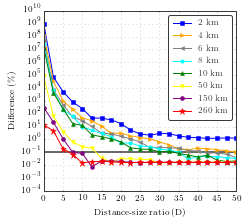

In [13]:
styles = "-s -> -< -p -^ -v -o -*".split()
colors = [u'#0000FF', u'#FFA500', u'#808080', u'#00FFFF', u'#008000',u'#FFFF00',u'#800080',u'#FF0000']
fig = plt.figure(figsize=(3.33, 3))
ax = plt.subplot(111)
for h, sty, color in zip(heights, styles, colors):
    shell_value = np.abs(shell[shell.height == h]['gzzz'].values)
    diff = 100*gzzz.loc[int(h)]/shell_value
    markersize = 4
    if sty[-1] == '*':
        markersize = 7
    ax.plot(ratio, diff, sty, label='{:.0f} km'.format(h/1000), color=color, 
            markeredgewidth=0.5, markeredgecolor=color, markersize=markersize)
ax.hlines(0.1, ratio.min(), ratio.max(), colors=['#3a3a3a'], linewidth=1.5)    
ax.set_xlim(ratio.min(), ratio.max())
ax.set_yscale('log')
ax.set_xticks(range(0, 55, 5))
ax.set_yticks(ax.get_yticks())
ax.minorticks_off()
ax.grid(True, linewidth=0.5, color='#aeaeae')
ax.set_axisbelow(True)
ax.set_ylabel('Difference (\\%)')
ax.set_xlabel('Distance-size ratio (D)')
ax.legend(borderpad=0.5, numpoints=1, bbox_to_anchor=(1, 1), 
          fancybox=True, shadow=False, fontsize=9)
plt.tight_layout(pad=0.25, h_pad=0, w_pad=0)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('fig/tesseroid-results-gzzz-colors.eps') 